**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [176]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [177]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [178]:
model = ExchangeEconomyClass()

# Question 1

Firstly we find all the pareto improvement points by using the following code. The points we find is the different combinations of X1A and X2A that leave both players as least as well off as they were when consuming their endowment. We find these point by using the functions for utility and consumption.

In [183]:
import numpy as np

ua = model.utility_A(model.par.w1A, model.par.w2A)
ub = model.utility_B(1-model.par.w1A, 1-model.par.w2A)
N = 75

list=[]

for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua and utilib >= ub:
            list.append((x1A,x2A))

print(list)
x, y = zip(*list)

[(0.08, 0.9600000000000001), (0.09333333333333334, 0.88), (0.09333333333333334, 0.8933333333333334), (0.09333333333333334, 0.9066666666666667), (0.09333333333333334, 0.92), (0.09333333333333334, 0.9333333333333333), (0.09333333333333334, 0.9466666666666668), (0.09333333333333334, 0.9600000000000001), (0.10666666666666667, 0.8266666666666668), (0.10666666666666667, 0.8400000000000001), (0.10666666666666667, 0.8533333333333334), (0.10666666666666667, 0.8666666666666667), (0.10666666666666667, 0.88), (0.10666666666666667, 0.8933333333333334), (0.10666666666666667, 0.9066666666666667), (0.10666666666666667, 0.92), (0.10666666666666667, 0.9333333333333333), (0.10666666666666667, 0.9466666666666668), (0.10666666666666667, 0.9600000000000001), (0.12000000000000001, 0.7866666666666667), (0.12000000000000001, 0.8), (0.12000000000000001, 0.8133333333333334), (0.12000000000000001, 0.8266666666666668), (0.12000000000000001, 0.8400000000000001), (0.12000000000000001, 0.8533333333333334), (0.1200000

Now when we have found all the pareto improvement points, it is possible to show them in an Edgeworth box. In he first part of the code we specify the total endownment of each good. Secondly we set up the figure and create the design. After that we plot in the pareto improvemtent points in the scatter and we also illustrate the initial endowment.

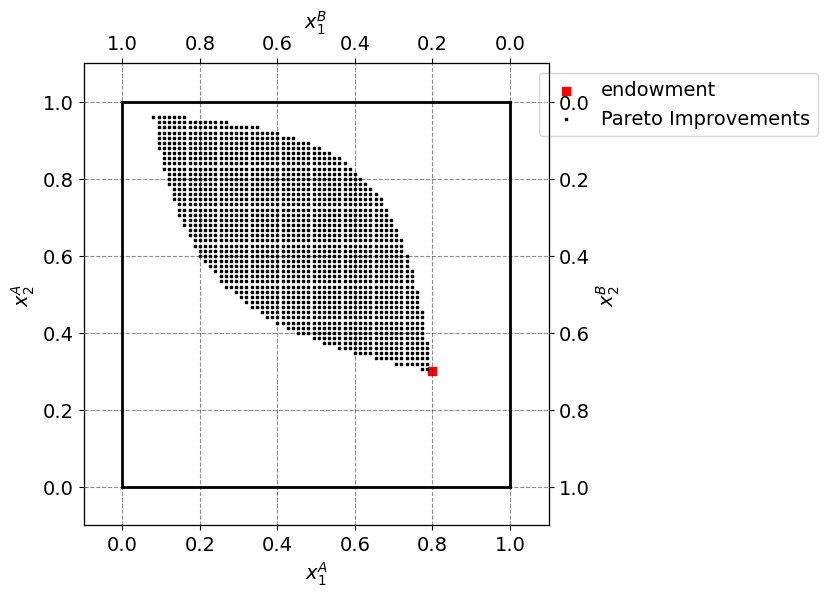

In [186]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x,y,marker='s',color='black',label='Pareto Improvements', s=0.8)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In this question we want to calculate the error in the market clearing condition s. Firstly we define conditions for the price of good 1. We then use the code that we have created in the ExchangeEconomy file to calculate the errors and we print them. We use the code in the end to illustrate the total market clearing error against p1 values.

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333
75 -0.373333  0.933333

[76 rows x 2 columns]


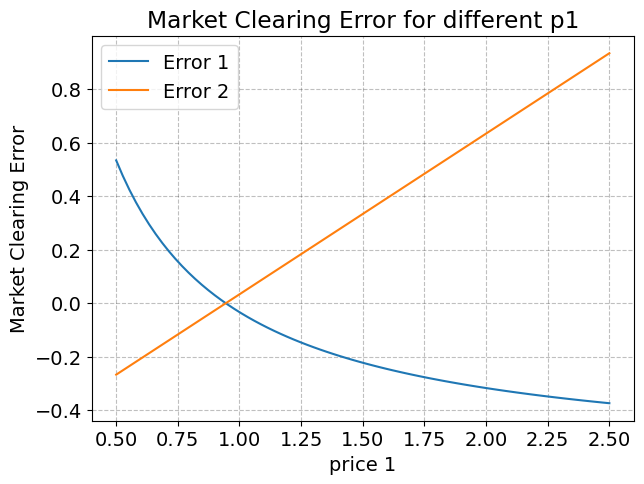

In [193]:
# 1. We start define p1 as:
p1 = [(0.5 + 2*i/75) for i in range(76)]

# 2. We calculate the errors:
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# 3. Pandas is imported:
import pandas as pd

# 4. Creating dataframe:
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

# Plotting the total market clearing error against p1 values
plt.figure(figsize=(7, 5))
plt.plot(p1, eps1, label='Error 1')
plt.plot(p1, eps2, label='Error 2')
plt.xlabel('price 1')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Error for different p1')
plt.legend()
plt.grid(True)
plt.show()


# Question 3

The market clearing price is the value of price 1 that makes the errors as small as possible. To find the market clearing price, we use code to calculate the price of good 1 where error of good 1 is the closest to zero. We find that the price then has to be 0.953.

In [192]:
# 1. EPS close to zero
eps_zero = np.abs(eps1).argmin()

# 2. Getting the price where eps1 is closest to zero
market_clearing_price = p1[eps_zero]


# 4. Print the market clearing price
print(f"The market clearing price is {market_clearing_price:.3f}.")

The market clearing price is 0.953.


# Question 4A